# Experiments with ICM20948 sensor



---

## Some facts about the ICM20948 chip

I have written a document about how to access the accelerometer, gyroscope and magnetometer of the `ICM20948` via I2C from a Raspberry Pi.

The original document has been created as a `LaTex` document from which a PDF document was generated.

`icm_20948_getting_started.tex` ,  `icm_20948_getting_started.pdf` 

(since I am not a profound Latex user the layout may be lacking the quality normally expected from such documents)

This notebooks provides some information about the properties of the accelerometer and the gyroscope.

---



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

## Recorded Data

For 6 fixed orientations of the ICM20948 sensor $N=1000$ readings of the accelerometer, gyroscope and the magnetometer have been obtained. The data have be stored in compressed `Numpy` files (file extension: `npz`).

For our purpose only (x,y,z) values of acceleration and gyroscope are retrieved and displayed.

In [2]:
# recorded readings
trace1 = "recordings/tst_data_1.npz"
trace2 = "recordings/tst_data_2.npz"
trace3 = "recordings/tst_data_3.npz"
trace4 = "recordings/tst_data_4.npz"
trace5 = "recordings/tst_data_5.npz"
trace6 = "recordings/tst_data_1s.npz"

In [3]:
# read trace data
out1 = np.load(trace1)
out2 = np.load(trace2)
out3 = np.load(trace3)
out4 = np.load(trace4)
out5 = np.load(trace5)
out6 = np.load(trace6)

# to see what is in these files 
print(f"out1.files   : {out1.files}")

out1.files   : ['t_vec', 't_diff_vec', 'accel_xyz', 'deg_ps_xyz', 'mag_xyz']


The raw data of the accelerometer and the gyroscope are displayed for the 6 available recordings.

While data have been recorded the orientation of the sensor has been unchanged.

**Expectations**

1) accelerometer data in x, y, z direction should ideally be constant for each record (sensor position).

2) the gyroscope data in x, y, z direction should ideally be 0 since there is no rotational movement during the duration of the recording

---


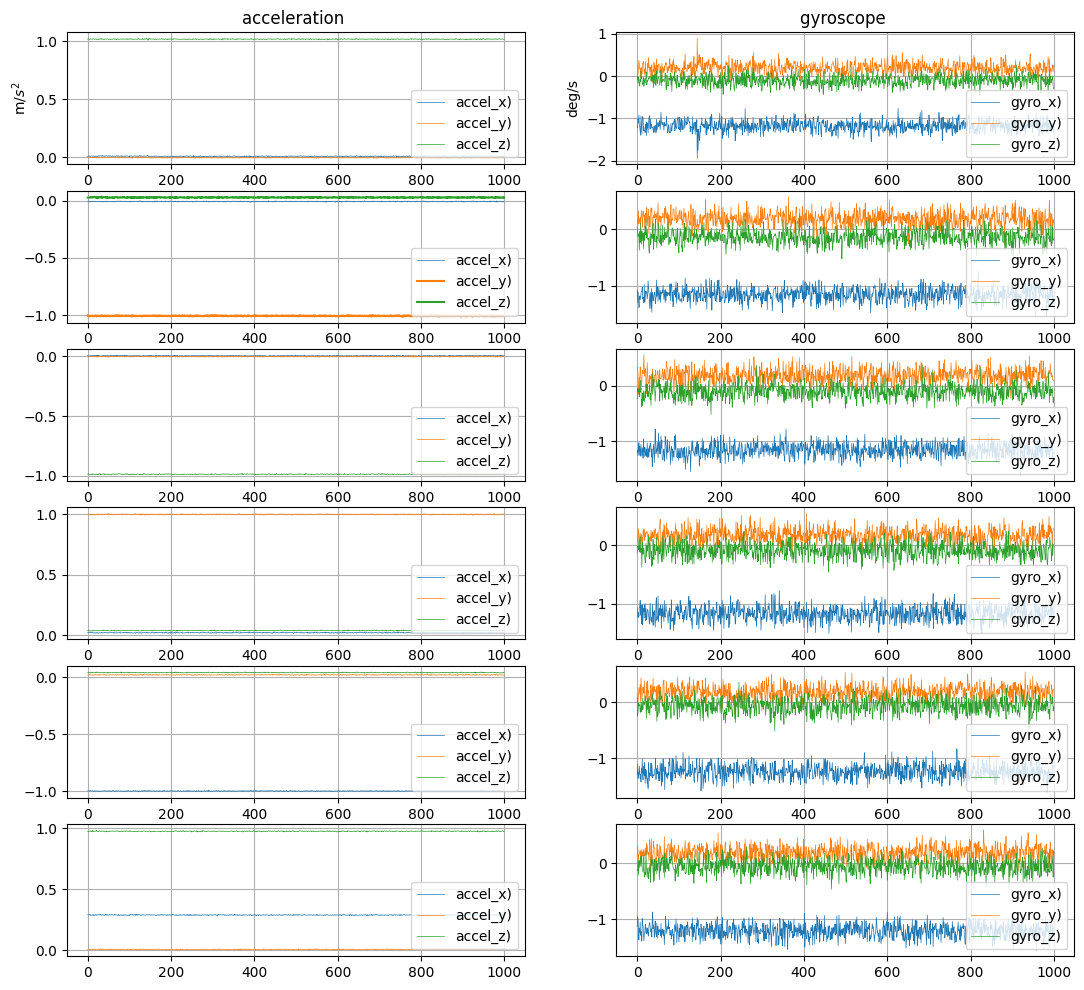

In [4]:
# display ...
fig1, ax1 = plt.subplots(nrows=6, ncols=2, figsize=(13, 12))

ax1[0,0].plot(out1['accel_xyz'][:,0], linewidth=0.5, label='accel_x)')
ax1[0,0].plot(out1['accel_xyz'][:,1], linewidth=0.5, label='accel_y)')
ax1[0,0].plot(out1['accel_xyz'][:,2], linewidth=0.5, label='accel_z)')
ax1[0,0].legend(loc='lower right')
ax1[0,0].grid(True)
ax1[0,0].set_xlabel('x')
ax1[0,0].set_ylabel('m/$s^2$')
ax1[0,0].set_title('acceleration ')

ax1[0,1].plot(out1['deg_ps_xyz'][:,0], linewidth=0.5, label='gyro_x)')
ax1[0,1].plot(out1['deg_ps_xyz'][:,1], linewidth=0.5, label='gyro_y)')
ax1[0,1].plot(out1['deg_ps_xyz'][:,2], linewidth=0.5, label='gyro_z)')
ax1[0,1].legend(loc='lower right')
ax1[0,1].grid(True)
ax1[0,1].set_xlabel('x')
ax1[0,1].set_ylabel('deg/s')
ax1[0,1].set_title('gyroscope ')

##

ax1[1,0].plot(out2['accel_xyz'][:,0], linewidth=0.5, label='accel_x)')
ax1[1,0].plot(out2['accel_xyz'][:,1], label='accel_y)')
ax1[1,0].plot(out2['accel_xyz'][:,2], label='accel_z)')
ax1[1,0].legend(loc='lower right')
ax1[1,0].grid(True)

ax1[1,1].plot(out2['deg_ps_xyz'][:,0], linewidth=0.5, label='gyro_x)')
ax1[1,1].plot(out2['deg_ps_xyz'][:,1], linewidth=0.5, label='gyro_y)')
ax1[1,1].plot(out2['deg_ps_xyz'][:,2], linewidth=0.5, label='gyro_z)')
ax1[1,1].legend(loc='lower right')
ax1[1,1].grid(True)

##

ax1[2,0].plot(out3['accel_xyz'][:,0], linewidth=0.5, label='accel_x)')
ax1[2,0].plot(out3['accel_xyz'][:,1], linewidth=0.5, label='accel_y)')
ax1[2,0].plot(out3['accel_xyz'][:,2], linewidth=0.5, label='accel_z)')
ax1[2,0].legend(loc='lower right')
ax1[2,0].grid(True)

ax1[2,1].plot(out3['deg_ps_xyz'][:,0], linewidth=0.5, label='gyro_x)')
ax1[2,1].plot(out3['deg_ps_xyz'][:,1], linewidth=0.5, label='gyro_y)')
ax1[2,1].plot(out3['deg_ps_xyz'][:,2], linewidth=0.5, label='gyro_z)')
ax1[2,1].legend(loc='lower right')
ax1[2,1].grid(True)

##

ax1[3,0].plot(out4['accel_xyz'][:,0], linewidth=0.5, label='accel_x)')
ax1[3,0].plot(out4['accel_xyz'][:,1], linewidth=0.5, label='accel_y)')
ax1[3,0].plot(out4['accel_xyz'][:,2], linewidth=0.5, label='accel_z)')
ax1[3,0].legend(loc='lower right')
ax1[3,0].grid(True)

ax1[3,1].plot(out4['deg_ps_xyz'][:,0], linewidth=0.5, label='gyro_x)')
ax1[3,1].plot(out4['deg_ps_xyz'][:,1], linewidth=0.5, label='gyro_y)')
ax1[3,1].plot(out4['deg_ps_xyz'][:,2], linewidth=0.5, label='gyro_z)')
ax1[3,1].legend(loc='lower right')
ax1[3,1].grid(True)

##

ax1[4,0].plot(out5['accel_xyz'][:,0], linewidth=0.5, label='accel_x)')
ax1[4,0].plot(out5['accel_xyz'][:,1], linewidth=0.5, label='accel_y)')
ax1[4,0].plot(out5['accel_xyz'][:,2], linewidth=0.5, label='accel_z)')
ax1[4,0].legend(loc='lower right')
ax1[4,0].grid(True)

ax1[4,1].plot(out5['deg_ps_xyz'][:,0], linewidth=0.5, label='gyro_x)')
ax1[4,1].plot(out5['deg_ps_xyz'][:,1], linewidth=0.5, label='gyro_y)')
ax1[4,1].plot(out5['deg_ps_xyz'][:,2], linewidth=0.5, label='gyro_z)')
ax1[4,1].legend(loc='lower right')
ax1[4,1].grid(True)

##

ax1[5,0].plot(out6['accel_xyz'][:,0], linewidth=0.5, label='accel_x)')
ax1[5,0].plot(out6['accel_xyz'][:,1], linewidth=0.5, label='accel_y)')
ax1[5,0].plot(out6['accel_xyz'][:,2], linewidth=0.5, label='accel_z)')
ax1[5,0].legend(loc='lower right')
ax1[5,0].grid(True)

ax1[5,1].plot(out6['deg_ps_xyz'][:,0], linewidth=0.5, label='gyro_x)')
ax1[5,1].plot(out6['deg_ps_xyz'][:,1], linewidth=0.5, label='gyro_y)')
ax1[5,1].plot(out6['deg_ps_xyz'][:,2], linewidth=0.5, label='gyro_z)')
ax1[5,1].legend(loc='lower right')
ax1[5,1].grid(True)

**Observation**

1) Apart from measurement noise the accelerometer data in x, y, z direction are constant for the duration of the recording / measurement

2) The gyroscope data in x, y, z direction are quite noisy. At least in one direction the gyroscope data deviates from an average value of 0. This indicates that some kind of offset compensation must be applied to the raw gyroscope data before any other processing of gyroscope data takes place.

## Checking the properties of the accelerometer

An ideal 3-axis accelerometer would have these properties:

1) The three sensors for measuring acceleration in x, y and z direction are mutually orthogonal

2) The sensitivity of each sensor is such that it provides a reading of exactly $g = 9.81~m/s^2$ when aligned in the direction of the gravitational force. All other sensor should give a reading of $0$.

3) If a sensor is aligned orthogonal to the direction of the gravitational force the reading shall be $0$. That is: the is no additive offset or bias.

Such an ideal accelerometer produces readings $a_x,~a_y,~a_z$ which yield $g = \sqrt{a_x^2 + a_y^2 + a_z^2}$  **independent** of the orientation of the sensor.

An experiment will show that the property $g = \sqrt{a_x^2 + a_y^2 + a_z^2}$ is only partly fulfilled for a practical sensor.

---


In [5]:
acc_total_1 = np.sum(out1['accel_xyz']**2, axis=1)
acc_total_2 = np.sum(out2['accel_xyz']**2, axis=1)
acc_total_3 = np.sum(out3['accel_xyz']**2, axis=1)
acc_total_4 = np.sum(out4['accel_xyz']**2, axis=1)
acc_total_5 = np.sum(out5['accel_xyz']**2, axis=1)
acc_total_6 = np.sum(out6['accel_xyz']**2, axis=1)

Text(0.5, 1.0, 'total acceleration : $a_{total} = \\sqrt{a_x^2 + a_y^2 + a_z^2}$ ')

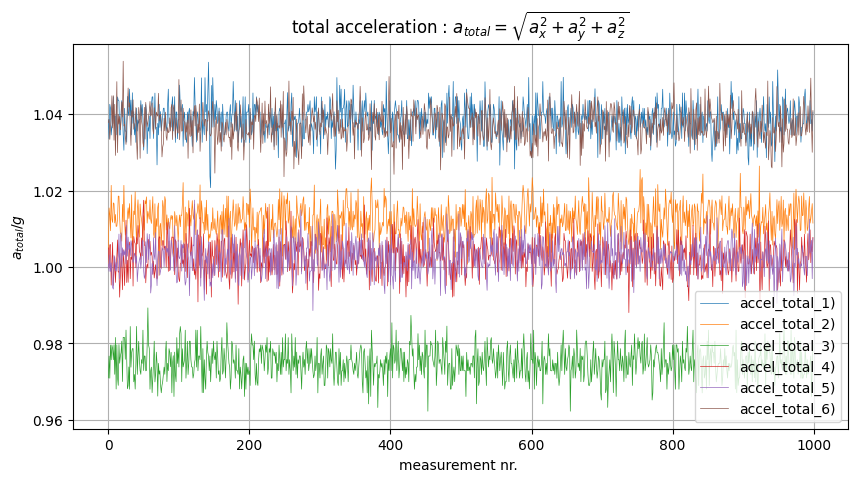

In [6]:
fig2, ax2 = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

ax2.plot(acc_total_1, linewidth=0.5, label='accel_total_1)')
ax2.plot(acc_total_2, linewidth=0.5, label='accel_total_2)')
ax2.plot(acc_total_3, linewidth=0.5, label='accel_total_3)')
ax2.plot(acc_total_4, linewidth=0.5, label='accel_total_4)')
ax2.plot(acc_total_5, linewidth=0.5, label='accel_total_5)')
ax2.plot(acc_total_6, linewidth=0.5, label='accel_total_6)')

ax2.legend(loc='lower right')
ax2.grid(True)
ax2.set_xlabel('measurement nr. ')
ax2.set_ylabel('$a_{total}/g$')
ax2.set_title(r'total acceleration : $a_{total} = \sqrt{a_x^2 + a_y^2 + a_z^2}$ ')

**Comment**

The figure confirms the assumption that a practical sensor suffers from misalignment errors which must be compensated using a calibration procedure.



## A simple test of the gyroscope

The sensor is rotated manually counter clock wise in x-direction by 90° and rotated back to 0°. Since the rotation is done manually the rotation speed will not be exactly constant. 

The figure from the datasheet of the ICM20948 sensor show the orientations. Counter clock-wise rotation results in a negative sign of the readings of the gyroscope. Rotating back to 0° results in a positive reading.

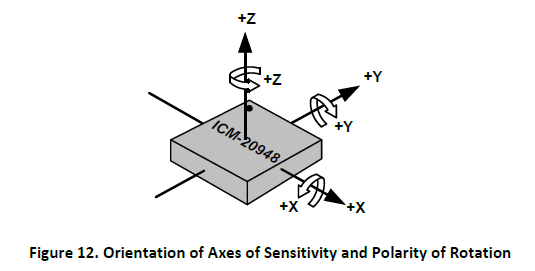

From the raw gyroscope data in x-direction the rotation angle in x-direction over the recording duration is obtained .

Ideally we would expect that the degree vs. time  changes more or less smoothly from 0° to -90° back to 0° and so on. But due to the uncompensated offset of the gyroscope this offset accumulate over time .

From the gyroscope recording we get raw data $v_g(t_n)$ of the angular velocity in x-direction at time instants $t_n$. The upper subplot shows these raw data over time.

The angle vs. time $\theta_x(t_n)$ is obtained from integration of the angular velocity

$$
\theta_x(t_n) = \sum_{i=0}^n v_g(t_i) \cdot (t_i - t_{i-1}) \ ; t_{-1} = 0
$$

The raw data show a constant offset of $o_x$. The compensated angle vs time is thus:

$$
\theta_{x;compensated}(t_n) = \sum_{i=0}^n (v_g(t_i) - o_x) \cdot (t_i - t_{i-1}) \ ; t_{-1} = 0
$$

The lower subplots shows the uncompensated and the compensated angle vs. time. Without compensation of the offset $o_x$ the angle vs. time plots show a drift of the angle.

The example shows that for any meaningful application, offset of the gyroscope should be measured and compensated before the readings are integrated to get the angles in x,y,z directions.

---


In [7]:

out_gyro_x_flip = np.load('recordings/gyro_x_flip.npz')

t_vec = out_gyro_x_flip['t_vec']
st =  out_gyro_x_flip['t_diff_vec']
angle_ps = out_gyro_x_flip['deg_ps_xyz']

# integrating the raw data of the gyroscope (x-direction)
deg_0 = 0.0
degree = np.cumsum(np.diff(t_vec) * angle_ps[1:,0])

bias_gyro_x = np.mean(out1['deg_ps_xyz'][:,0])
degree_cp = degree - np.cumsum(np.diff(t_vec) * bias_gyro_x)

Text(0.5, 1.0, 'angle vs. time : x-direction')

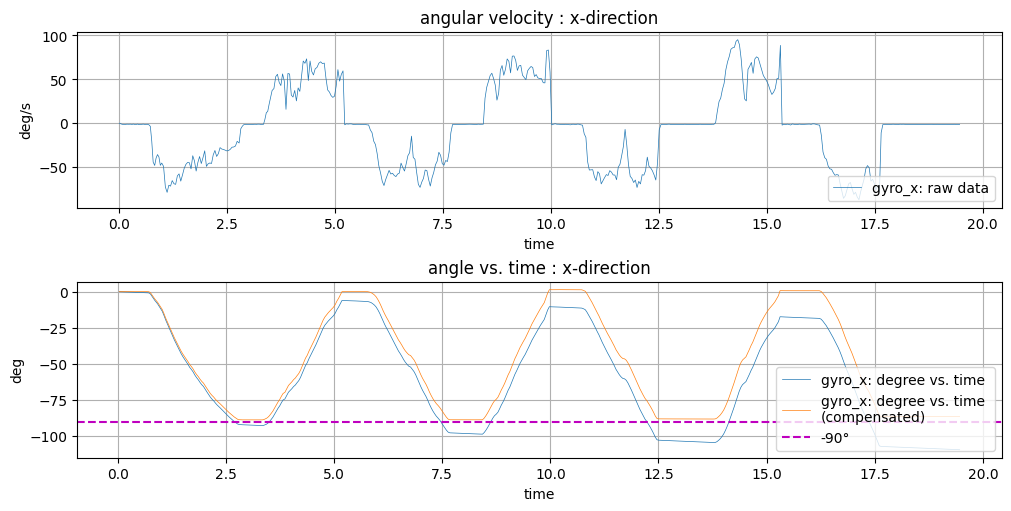

In [8]:
fig3, ax3 = plt.subplots(nrows=2, ncols=1, figsize=(10, 5), constrained_layout=True)

#fig3.tight_layout()
ax3[0].plot(t_vec, angle_ps[:,0], linewidth=0.5, label='gyro_x: raw data')
ax3[0].legend(loc='lower right')
ax3[0].grid(True)
ax3[0].set_xlabel('time')
ax3[0].set_ylabel('deg/s')
ax3[0].set_title(r'angular velocity : x-direction')

ax3[1].plot(t_vec[1:], degree, linewidth=0.5, label='gyro_x: degree vs. time')
ax3[1].plot(t_vec[1:], degree_cp, linewidth=0.5, label='gyro_x: degree vs. time \n(compensated)')
ax3[1].axhline(-90, linestyle='--', color='m', label='-90°')
ax3[1].legend(loc='lower right')
ax3[1].grid(True)
ax3[1].set_xlabel('time')
ax3[1].set_ylabel('deg')
ax3[1].set_title(r'angle vs. time : x-direction')